In [14]:
from azure.cosmos import CosmosClient
import pandas as pd

# Set your Cosmos DB connection details
COSMOS_URI = ""
COSMOS_KEY = ""
DATABASE_NAME = "SensorDataDB"
CONTAINER_NAME = "SensorReadings"

# Initialize the Cosmos client
client = CosmosClient(COSMOS_URI, credential=COSMOS_KEY)
database = client.get_database_client(DATABASE_NAME)
container = database.get_container_client(CONTAINER_NAME)

# Query all sensor data
query = "SELECT * FROM c"
items = list(container.query_items(
    query=query,
    enable_cross_partition_query=True
))

# Convert the results into a Pandas DataFrame
df = pd.DataFrame(items)
print(df)


                                      id  deviceId  temperature  humidity  \
0   988ab28b-f789-4c65-aa7e-3d870eed0141  Device-4        33.55     36.68   
1   4407d99d-837e-436c-aa29-03a64ebc64ea  Device-1        24.61     65.01   
2   6f023c47-8ed5-4e18-ac72-cf942483043d  Device-5        34.76     40.52   
3   988da414-ae44-478a-b327-9d8605c7c674  Device-1        25.14     65.28   
4   2d6e3b66-050a-4cb0-a643-ee4833be65a3  Device-3        28.92     55.72   
5   a50752a8-fbf8-4e77-a5ac-cfadab90a4a7  Device-3        34.29     46.36   
6   9b393956-6bc1-400a-9d07-128275a923e6  Device-1        34.91     69.91   
7   57fe061d-48ea-4a72-b0d1-4076b3331b26  Device-5        34.34     60.46   
8   94dbef7b-9194-4f9d-a722-35c2340a6663  Device-1        31.71     41.65   
9   1cbe7107-5420-481d-89ee-f19f4be0b3cc  Device-5        20.83     56.34   
10  3292d2ae-e1e2-4015-b6c8-83071a12e44f  Device-5        24.26     31.62   
11  97e15c1f-f0ca-44aa-baed-2d38f503c482  Device-4        24.59     61.44   

In [12]:
print("Data Shape:", df.shape)
print(df.describe())

# Optionally drop rows with missing values if needed
df_clean = df.dropna()


Data Shape: (41, 10)
       temperature   humidity           _ts
count    41.000000  41.000000  4.100000e+01
mean     27.457561  53.770732  1.741224e+09
std       4.730893  12.367212  8.361119e+01
min      20.500000  31.620000  1.741224e+09
25%      23.680000  46.360000  1.741224e+09
50%      25.610000  53.770000  1.741224e+09
75%      32.350000  64.530000  1.741224e+09
max      34.910000  69.960000  1.741224e+09


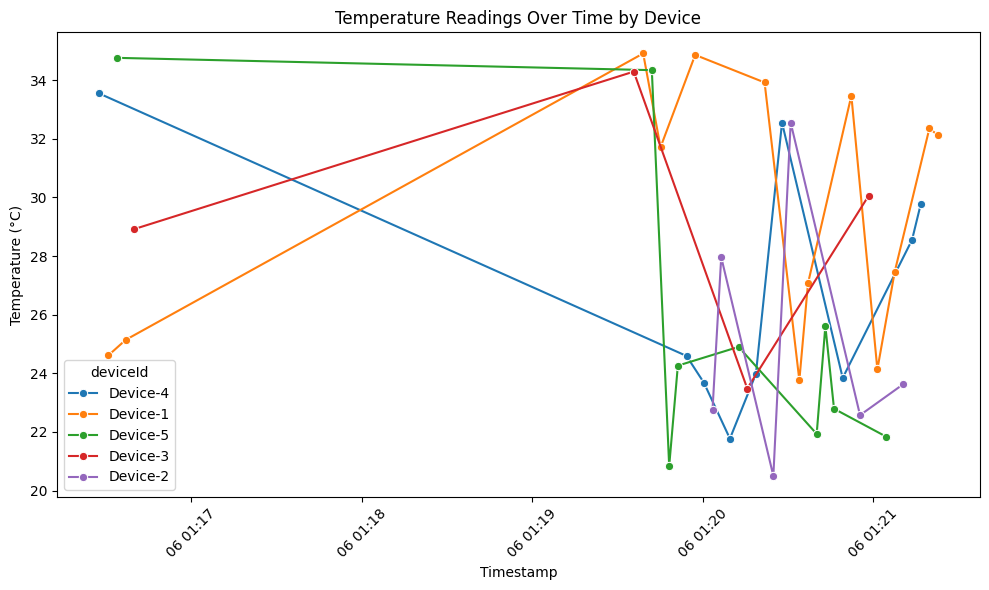

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the timestamp field to datetime objects
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='timestamp', y='temperature', hue='deviceId', data=df_clean, marker="o")
plt.title("Temperature Readings Over Time by Device")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
